In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import fetch_openml
titanic_data= fetch_openml("titanic", version=1, as_frame=True)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
df = titanic_data['data'] # to variable "df" titanic data is stored
df['survived']=titanic_data['target'] #creating new colmn "survived" and storing targets of the titanic_dataset
df.head(2) # printing the data using ".head()" passing value 2 to print only two rows

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1


<Axes: xlabel='survived', ylabel='count'>

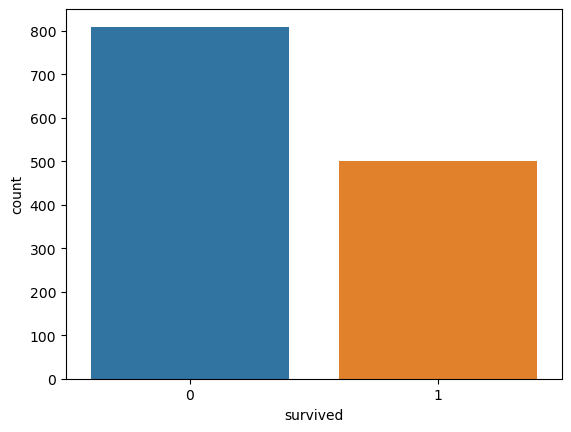

In [4]:
sns.countplot(x="survived", data=df) # Checking how many people survived, for better understanding of data set

<Axes: xlabel='survived', ylabel='count'>

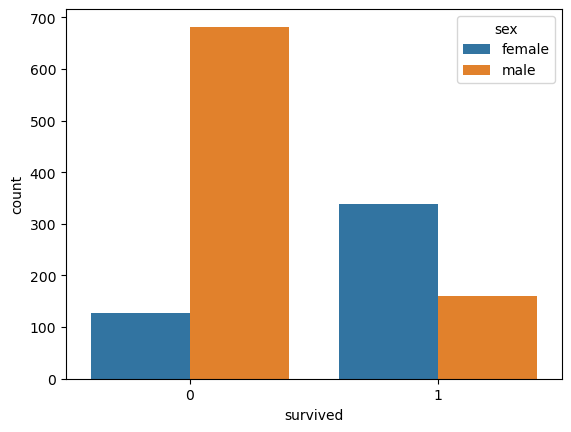

In [5]:
sns.countplot(x="survived",hue='sex' ,data=df) #Checking which gender had better chance of surviving ,  in "hue" arrgument we can pass any colmn name to check the graph

<Axes: xlabel='survived', ylabel='count'>

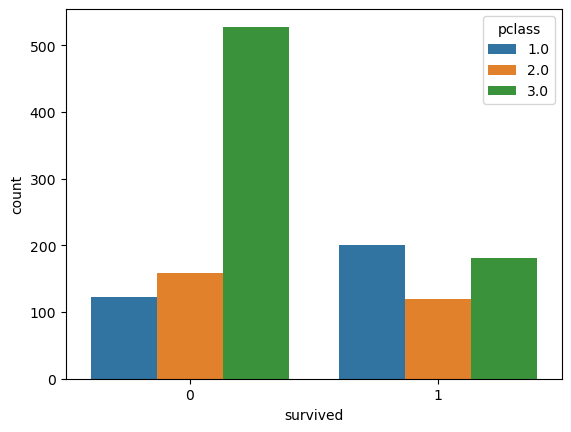

In [6]:
sns.countplot(x="survived",hue='pclass' ,data=df)

<Axes: ylabel='Frequency'>

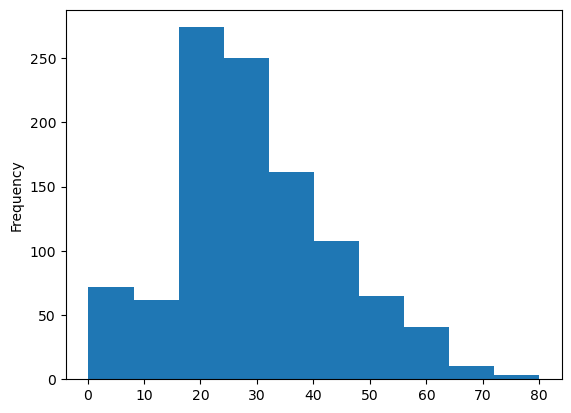

In [7]:
df['age'].plot.hist() #ploting the graph to know wwhich age group were higher present in titanic

In [8]:
df.info() #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [9]:
# Lets start preprocessing

In [10]:
df['family']=df['parch']+df['sibsp'] # as we can see both colums "parch" and "sibsp" are related to family
                                    # we combined both colums to singe colmn name "family"
df.loc[df['family']>0, 'travelled_alone' ]=1 # here feature engineering done
                                             #creating a new column travelled_alone
                                             #assign value 1 if a person is travelling with his family
df.loc[df['family']==0, 'travelled_alone' ]=0 # here ".loc()" for comparing data with family column and assign the values in travelled_alone
df.head(1) # print and check


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0.0,0.0


In [11]:
df.loc[df['sex']=='female', 'sex_updated' ]=1 # as we can see datatype of sex is catogry
                                              #which canot be used while training the model
                                              #we have created a new column "sex_update" and stored sex in form of numerical value
                                              #female=1,male=0
df.loc[df['sex']=='male', 'sex_updated' ]=0
df.drop(['sex'], axis=1, inplace=True) # as sex column is not necessary drop it


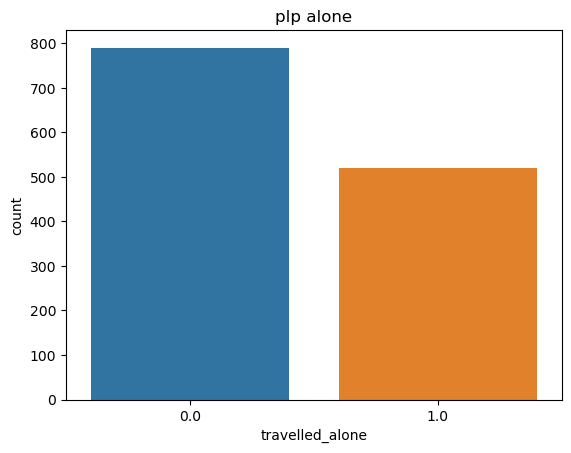

In [12]:
import matplotlib.pyplot as plt
sns.countplot(x='travelled_alone', data = df) # check no of plp travellin alone
plt.title("plp alone")
plt.show()

In [13]:
df.drop(['name', 'ticket','home.dest'], axis=1, inplace=True) # droping the unwanted columns which may not be usefull for training model
                                                                # ".drop()" methos is used and list of column names are sent
                                                                # axis=1, means droping colums, 
                                                                # inplace=True update the changes in local dataframe saved in computer(if saved)
df.head(1)

,pclass,age,sibsp,parch,fare,cabin,embarked,boat,body,survived,family,travelled_alone,sex_updated
0,1.0,29.0,0.0,0.0,211.3375,B5,S,2,NaN,1,0.0,0.0,1.0


In [14]:
df.drop(['cabin','body','boat'], axis=1, inplace=True) # droping the unwanted columns which may not be usefull for training model

In [15]:
df.isnull().sum() #checking the null values present in dataset and suming up them

pclass               0
age                263
sibsp                0
parch                0
fare                 1
embarked             2
survived             0
family               0
travelled_alone      0
sex_updated          0
dtype: int64

In [16]:
# now, we have to remove null values from data. we can use Imputer method in sklearn to do so
from sklearn.impute import SimpleImputer 
imp = SimpleImputer(strategy='mean') # creating variaple imp and calling simpleimputer by setting statergy of creating new values to mean of neighbour values
df['age']=imp.fit_transform(df[['age']]) #using fit_trasform method to impute
df['fare']=imp.fit_transform(df[['fare']])

In [17]:
imp_freq= SimpleImputer(strategy='most_frequent')  # as "embarked" column is category we use statergy as "most frequent" which update values based on neighbour
df['embarked']=imp_freq.fit_transform(df[['embarked']])

In [18]:
embark= pd.get_dummies(df['embarked'], drop_first=True) #As embarked has 3 values, creating dummies of each value in seperate colums and droping first one
                                                        #droping 1 out of 3 still gives the same result
print(embark)

      Q  S
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
...  .. ..
1304  0  0
1305  0  0
1306  0  0
1307  0  0
1308  0  1

[1309 rows x 2 columns]


In [19]:
df = pd.concat([df,embark], axis=1) #concatinating newly created dumies to main dataframe
df.drop(['embarked'], axis=1, inplace=True)


In [21]:
df.isnull().sum() #checking the null values

pclass             0
age                0
sibsp              0
parch              0
fare               0
survived           0
family             0
travelled_alone    0
sex_updated        0
Q                  0
S                  0
dtype: int64

In [24]:
#spliting data into input_x and output_y
x=df.drop(['survived'], axis=1)
y=df['survived']

In [25]:
#spliting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.3, random_state=1)


In [26]:
from sklearn.linear_model import LogisticRegression #importing linearregreession algorithm
mod=LogisticRegression() #assign a variable
mod.fit(x_train, y_train) #fitting the model

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
predictions = mod.predict(x_test) #storing predictions in a variable. using ".predict" method to do predictions

In [28]:
from sklearn.metrics import accuracy_score #accuracy
accuracy_score(y_test,predictions)*100

79.38931297709924

In [29]:
from sklearn.metrics import confusion_matrix #matric which says TP,TN,FP,FN cases
confusion_matrix(y_test, predictions)

array([[205,  31],
       [ 50, 107]], dtype=int64)

In [30]:
df.to_csv('cleaned_titanic.csv', index=False) #exporting the preprocessed file without index